In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [41]:
df= pd.read_csv("sales.csv",parse_dates = ["Date"])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [43]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [44]:
df.shape

(6435, 8)

In [45]:
df.columns.tolist()

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [46]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [47]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [49]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst = True)

In [50]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [51]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5500,39,2011-05-13,1325022.77,0,77.39,3.899,214.689978,8.300
1264,9,2012-05-25,547226.00,0,79.69,3.561,225.494429,5.539
1780,13,2011-04-29,1895583.12,0,43.85,3.683,128.999867,7.193
133,1,2012-08-24,1494122.38,0,77.66,3.620,222.171946,6.908
3306,24,2010-06-04,1566668.91,0,71.99,3.006,132.364839,8.211
2578,19,2010-03-05,1495844.57,0,32.92,2.919,131.735000,8.350
6199,44,2011-01-21,276157.80,0,34.80,2.934,127.440484,7.224
6099,43,2011-11-18,628115.61,0,57.75,3.308,209.865107,10.148
4066,29,2011-04-15,518245.97,0,48.88,3.823,134.278467,9.966
6122,43,2012-04-27,593138.59,0,78.27,3.814,213.062819,9.575


In [ ]:
plt.figure(figsize = (12,8))
for i, val in df.groupby("Store"):
    plt.plot(val["Date"],val["Weekly_Sales"],label = f"Store {i}")
    
plt.title("Stores Revenue")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

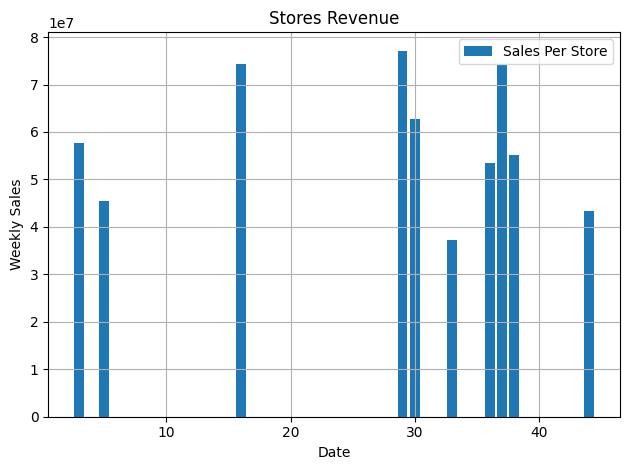

In [79]:
sales_per_store = df.groupby("Store")['Weekly_Sales'].sum().round()
sales_per_store = sales_per_store.sort_values(ascending = True).reset_index('Store').head(10)
sales_per_store

plt.bar(sales_per_store["Store"],sales_per_store["Weekly_Sales"],label = "Sales Per Store")
plt.title("Stores Revenue")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.legend()

In [113]:
holiday_boost = df.groupby("Holiday_Flag")["Weekly_Sales"].mean().round()
holiday_boost

Holiday_Flag
0    1041256.0
1    1122888.0
Name: Weekly_Sales, dtype: float64

<BarContainer object of 2 artists>

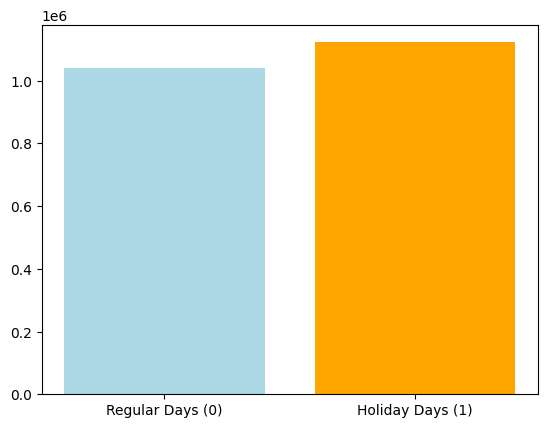

In [111]:
plt.bar(["Regular Days (0)", "Holiday Days (1)"],holiday_boost.values,color=['lightblue', 'orange'])

In [147]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5777,41,2011-03-11,1159089.60,0,31.60,3.372,192.058484,7.241
1373,10,2011-09-30,1627707.31,0,82.27,3.877,129.606067,8.257
1910,14,2011-01-28,1613718.38,0,24.05,3.237,183.180095,8.549
5707,40,2012-08-03,1068346.76,0,70.15,3.698,138.173581,4.156
1763,13,2010-12-31,1675292.00,1,26.79,2.868,127.087677,7.795
3187,23,2010-11-19,1314994.32,0,41.66,3.030,132.917200,5.287
4064,29,2011-04-01,475615.26,0,36.04,3.638,134.068258,9.966
2064,15,2011-04-15,607691.36,0,48.63,3.981,134.278467,7.658
1229,9,2011-09-23,506743.78,0,74.42,3.467,219.974642,6.404
2993,21,2012-08-24,802003.61,0,77.72,3.620,221.808352,6.565


In [172]:
store1 = df[df["Store"] == 1]

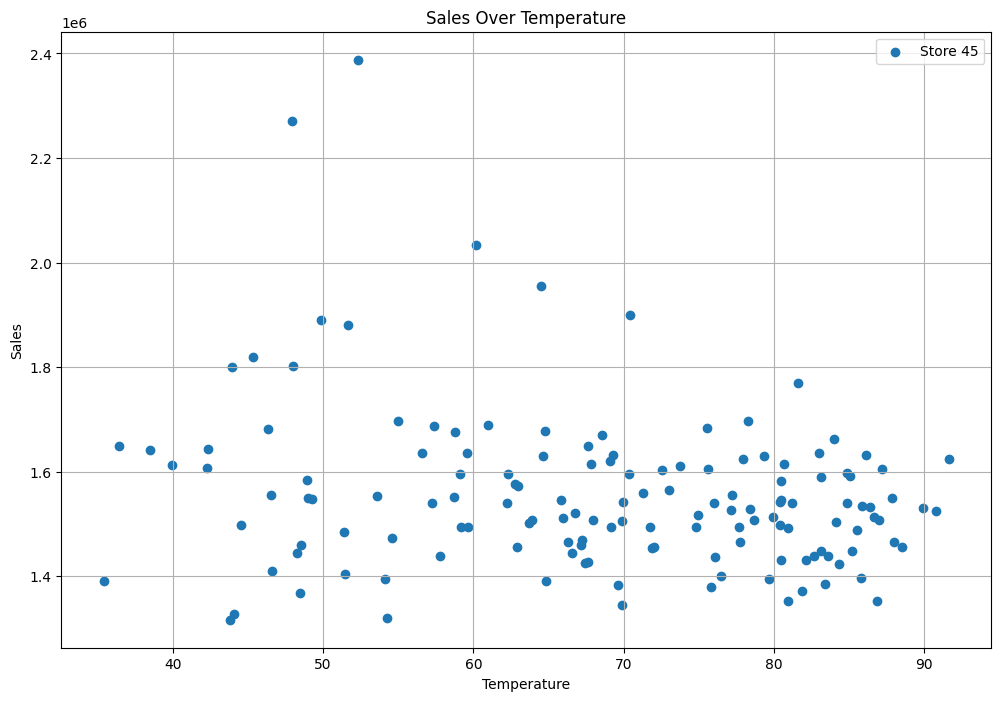

In [173]:
plt.figure(figsize = (12,8))
plt.scatter(store1["Temperature"],store1["Weekly_Sales"],label = f"Store 1")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Sales Over Temperature")
plt.grid(True)